In [2]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta 

In [3]:
resultat = pd.read_csv("/home/paul_o/dossierlinux/THP/09.08.2023/dataviz/source/resultats-par-niveau-cirlg-t1-france-entiere.csv")
positionnement = pd.read_csv("/home/paul_o/dossierlinux/THP/09.08.2023/dataviz/source/positionnement_politique_v3.csv")
numeros = pd.read_excel("/home/paul_o/dossierlinux/THP/09.08.2023/dataviz/source/n°_de_panneaux.xlsx")
display(resultat)

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Etat saisie,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,...,Voix_11,% Voix/Ins_11,% Voix/Exp_11,N°Panneau_12,Sexe_12,Nom_12,Prénom_12,Voix_12,% Voix/Ins_12,% Voix/Exp_12
0,01,Ain,1,1ère circonscription,Complet,85723,18592,21.69,67131,78.31,...,437,0.51,0.67,12,M,DUPONT-AIGNAN,Nicolas,1753,2.04,2.67
1,01,Ain,2,2ème circonscription,Complet,99383,19917,20.04,79466,79.96,...,467,0.47,0.60,12,M,DUPONT-AIGNAN,Nicolas,1883,1.89,2.42
2,01,Ain,3,3ème circonscription,Complet,81500,20440,25.08,61060,74.92,...,424,0.52,0.71,12,M,DUPONT-AIGNAN,Nicolas,1820,2.23,3.04
3,01,Ain,4,4ème circonscription,Complet,94359,19826,21.01,74533,78.99,...,445,0.47,0.61,12,M,DUPONT-AIGNAN,Nicolas,2020,2.14,2.78
4,01,Ain,5,5ème circonscription,Complet,77144,18766,24.33,58378,75.67,...,399,0.52,0.70,12,M,DUPONT-AIGNAN,Nicolas,1522,1.97,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,ZZ,Français établis hors de France,7,7ème circonscription,Complet,122158,69559,56.94,52599,43.06,...,349,0.29,0.67,12,M,DUPONT-AIGNAN,Nicolas,639,0.52,1.23
573,ZZ,Français établis hors de France,8,8ème circonscription,Complet,130065,106455,81.85,23610,18.15,...,133,0.10,0.57,12,M,DUPONT-AIGNAN,Nicolas,300,0.23,1.28
574,ZZ,Français établis hors de France,9,9ème circonscription,Complet,121122,81344,67.16,39778,32.84,...,135,0.11,0.34,12,M,DUPONT-AIGNAN,Nicolas,381,0.31,0.97
575,ZZ,Français établis hors de France,10,10ème circonscription,Complet,103910,63575,61.18,40335,38.82,...,163,0.16,0.41,12,M,DUPONT-AIGNAN,Nicolas,530,0.51,1.33


In [4]:
positionnement[["prenom","nom"]]=positionnement["nom_candidat"].str.split(n=1, expand=True)
positionnement = positionnement.drop(['nom_candidat'], axis=1)

In [5]:
positionnement = positionnement.reindex(columns=["nom", "prenom", "parti_politique", "sigle", "positionnement", "details_positionnement", "tete_du_parti"])
positionnement["nom"] = positionnement["nom"].str.upper()
numeros = numeros.drop(["prenom"], axis=1)

In [6]:
positionnement = pd.merge(numeros, positionnement, on="nom" )

In [7]:
positionnement = positionnement.sort_values(by=['positionnement'], ascending=False)

In [8]:
positionnement_gauche = positionnement.loc[positionnement['positionnement'] == 'gauche',"numeros"]
positionnement_gauche = positionnement_gauche.values
positionnement_gauche_2 =[]
for i in positionnement_gauche:
    positionnements = "Voix_"+str(i)
    positionnement_gauche_2.append(positionnements)

In [9]:
positionnement_droite = positionnement.loc[positionnement['positionnement'] == 'droite',"numeros"]
positionnement_droite = positionnement_droite.values
positionnement_droite_2 = []
for i in positionnement_droite:
    positionnements = "Voix_"+str(i)
    positionnement_droite_2.append(positionnements)
    
print(positionnement_droite_2)

['Voix_12', 'Voix_4', 'Voix_5', 'Voix_3', 'Voix_10', 'Voix_6']


In [10]:
positionnement_candidat =positionnement['numeros'].values
positionnement_candidat_final = []
for i in positionnement_candidat:
    positionnements = "% Voix/Exp_"+str(i)
    positionnement_candidat_final.append(positionnements)

In [11]:
resultat["vote_pour_gauche"] = resultat[positionnement_gauche_2].sum(axis=1)

In [19]:
resultat["vote_pour_droite"] = resultat[positionnement_droite_2].sum(axis=1)

In [12]:
resultat["pourcentage_gauche"]=(resultat["vote_pour_gauche"]/resultat["Votants"] *100).round(2)
a_gauche = resultat.loc[resultat["pourcentage_gauche"] > 50.00]
prop_crico_gauche = (a_gauche["pourcentage_gauche"].count()/resultat["pourcentage_gauche"].count()*100).round(2)
print(prop_crico_gauche,"%")

6.24 %


In [20]:
resultat["pourcentage_droite"]=(resultat["vote_pour_droite"]/resultat["Votants"] *100).round(2)
a_droite = resultat.loc[resultat["pourcentage_droite"] > 50.00]
prop_crico_droite = (a_droite["pourcentage_droite"].count()/resultat["pourcentage_droite"].count()*100).round(2)
print(prop_crico_droite,"%")

92.03 %


In [22]:
hesitant = resultat.loc[resultat["pourcentage_droite"] == 50.00]
prop_crico_hesitant = (hesitant["pourcentage_droite"].count()/resultat["pourcentage_droite"].count()*100).round(2)
print(prop_crico_hesitant,"%")

0.0 %


In [13]:
a_gauche_small = a_gauche.iloc[:,[0,1,3,-1]]
a_gauche_small.value_counts()
#a_gauche_small["pourcentage_gauche"].plot(kind='bar',width=0.5)
#plt.show()

Code du département  Libellé du département    Libellé de la circonscription  pourcentage_gauche
13                   Bouches-du-Rhône          4ème circonscription           62.53                 1
                                               7ème circonscription           55.91                 1
94                   Val-de-Marne              11ème circonscription          53.26                 1
                                               2ème circonscription           52.50                 1
                                               9ème circonscription           50.91                 1
95                   Val-d'Oise                5ème circonscription           54.49                 1
                                               8ème circonscription           55.12                 1
ZA                   Guadeloupe                1ère circonscription           62.11                 1
                                               2ème circonscription           55.12    

,Code du département,Libellé du département,Libellé de la circonscription,% Abs/Ins
573,ZZ,Français établis hors de France,8ème circonscription,81.85
567,ZZ,Français établis hors de France,2ème circonscription,75.85
561,ZP,Polynésie française,2ème circonscription,73.50
548,ZC,Guyane,2ème circonscription,71.03
562,ZP,Polynésie française,3ème circonscription,70.82
559,ZN,Nouvelle-Calédonie,2ème circonscription,68.83
566,ZZ,Français établis hors de France,1ère circonscription,67.93
570,ZZ,Français établis hors de France,5ème circonscription,67.59
574,ZZ,Français établis hors de France,9ème circonscription,67.16
568,ZZ,Français établis hors de France,3ème circonscription,65.68


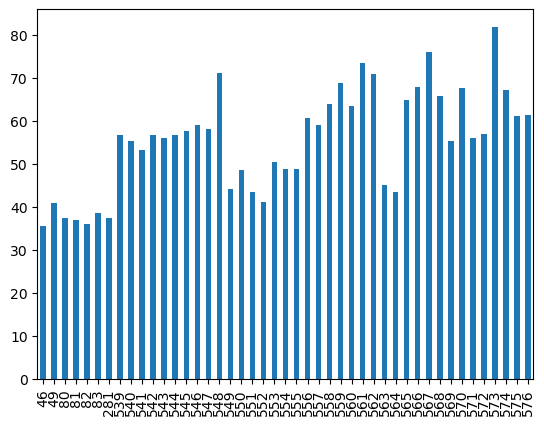

In [14]:
most_abstention = resultat.loc[resultat["% Abs/Ins"] > 35]
display(most_abstention.iloc[:,[0,1,3,7]].sort_values(by=['% Abs/Ins'], ascending=False).head(20))
most_abstention["% Abs/Ins"].plot(kind='bar',width=0.5)
plt.show()

In [15]:
display(resultat["pourcentage_gauche"].describe().round(2))

count    577.00
mean      31.98
std        9.48
min       14.87
25%       25.51
50%       29.62
75%       35.18
max       66.71
Name: pourcentage_gauche, dtype: float64

In [31]:
display(positionnement)

,numeros,nom,prenom,parti_politique,sigle,positionnement,details_positionnement,tete_du_parti
0,1,ARTHAUD,Nathalie,Lutte ouvrière,LO,gauche,extrême gauche,"Nathalie Arthaud et Jean-Pierre Mercier, porte..."
2,8,HIDALGO,Anne,Le Parti socialiste,PS,gauche,centre gauche,"Olivier Faure, premier secrétaire"
3,9,JADOT,Yannick,le Pôle écologiste,aucun,gauche,gauche écologie,pas un parti mais une coalition
6,7,MÉLENCHON,Jean-Luc,La France insoumise,"LFI, FI",gauche,extrême gauche,"Adrien Quatennens, coordinateur"
9,11,POUTOU,Philippe,Nouveau Parti anticapitaliste,NPA,gauche,extrême gauche,"Christine Poupin, porte-parole"
10,2,ROUSSEL,Fabien,Parti communiste français,PCF,gauche,extrême gauche,"Fabien Roussel, secrétaire national"
1,12,DUPONT-AIGNAN,Nicolas,Debout La France,DLF,droite,extrême droite,"Nicolas Dupont-Aignan, président"
4,4,LASALLE,Jean,Résistons,pas de sigle,droite,centre droite,"Jean Lassalle, président"
5,5,LE PEN,Marine,Le Rassemblement national,RN,droite,extrême droite,Marine Le Pen (intérim assuré par Jordan Barde...
7,3,MACRON,Emmanuel,La République en Marche,"LREM, LaREM, voire REM ou LRM",droite,centre droite,"Stanislas Guerini, délégué général"


In [17]:
results_describe = resultat[positionnement_candidat_final].describe().round(2)
results_describe_mean = resultat[positionnement_candidat_final].mean().round(2)
results_describe_std = resultat[positionnement_candidat_final].std().round(2)
results_describe_cv= (results_describe_std/results_describe_mean)*100
results_describe

,% Voix/Exp_1,% Voix/Exp_8,% Voix/Exp_9,% Voix/Exp_7,% Voix/Exp_11,% Voix/Exp_2,% Voix/Exp_12,% Voix/Exp_4,% Voix/Exp_5,% Voix/Exp_3,% Voix/Exp_10,% Voix/Exp_6
count,577.00,577.00,577.00,577.00,577.00,577.00,577.00,577.00,577.00,577.00,577.00,577.00
mean,0.57,1.74,4.53,22.88,0.76,2.24,2.05,3.03,22.84,27.55,4.79,7.02
std,0.21,0.58,1.77,9.51,0.19,0.94,0.64,2.09,8.84,6.24,1.82,2.41
min,0.09,0.68,0.81,9.35,0.21,0.44,0.64,0.56,2.59,12.01,0.94,1.02
25%,0.42,1.29,3.28,16.90,0.65,1.83,1.62,1.73,16.87,23.55,3.81,5.59
50%,0.55,1.64,4.25,20.19,0.76,2.14,2.06,2.58,23.35,26.75,4.61,6.70
75%,0.71,2.08,5.61,24.98,0.88,2.58,2.41,3.45,28.85,30.87,5.40,7.78
max,1.83,4.63,11.11,61.60,2.00,12.41,6.40,20.77,47.77,51.01,25.27,20.92


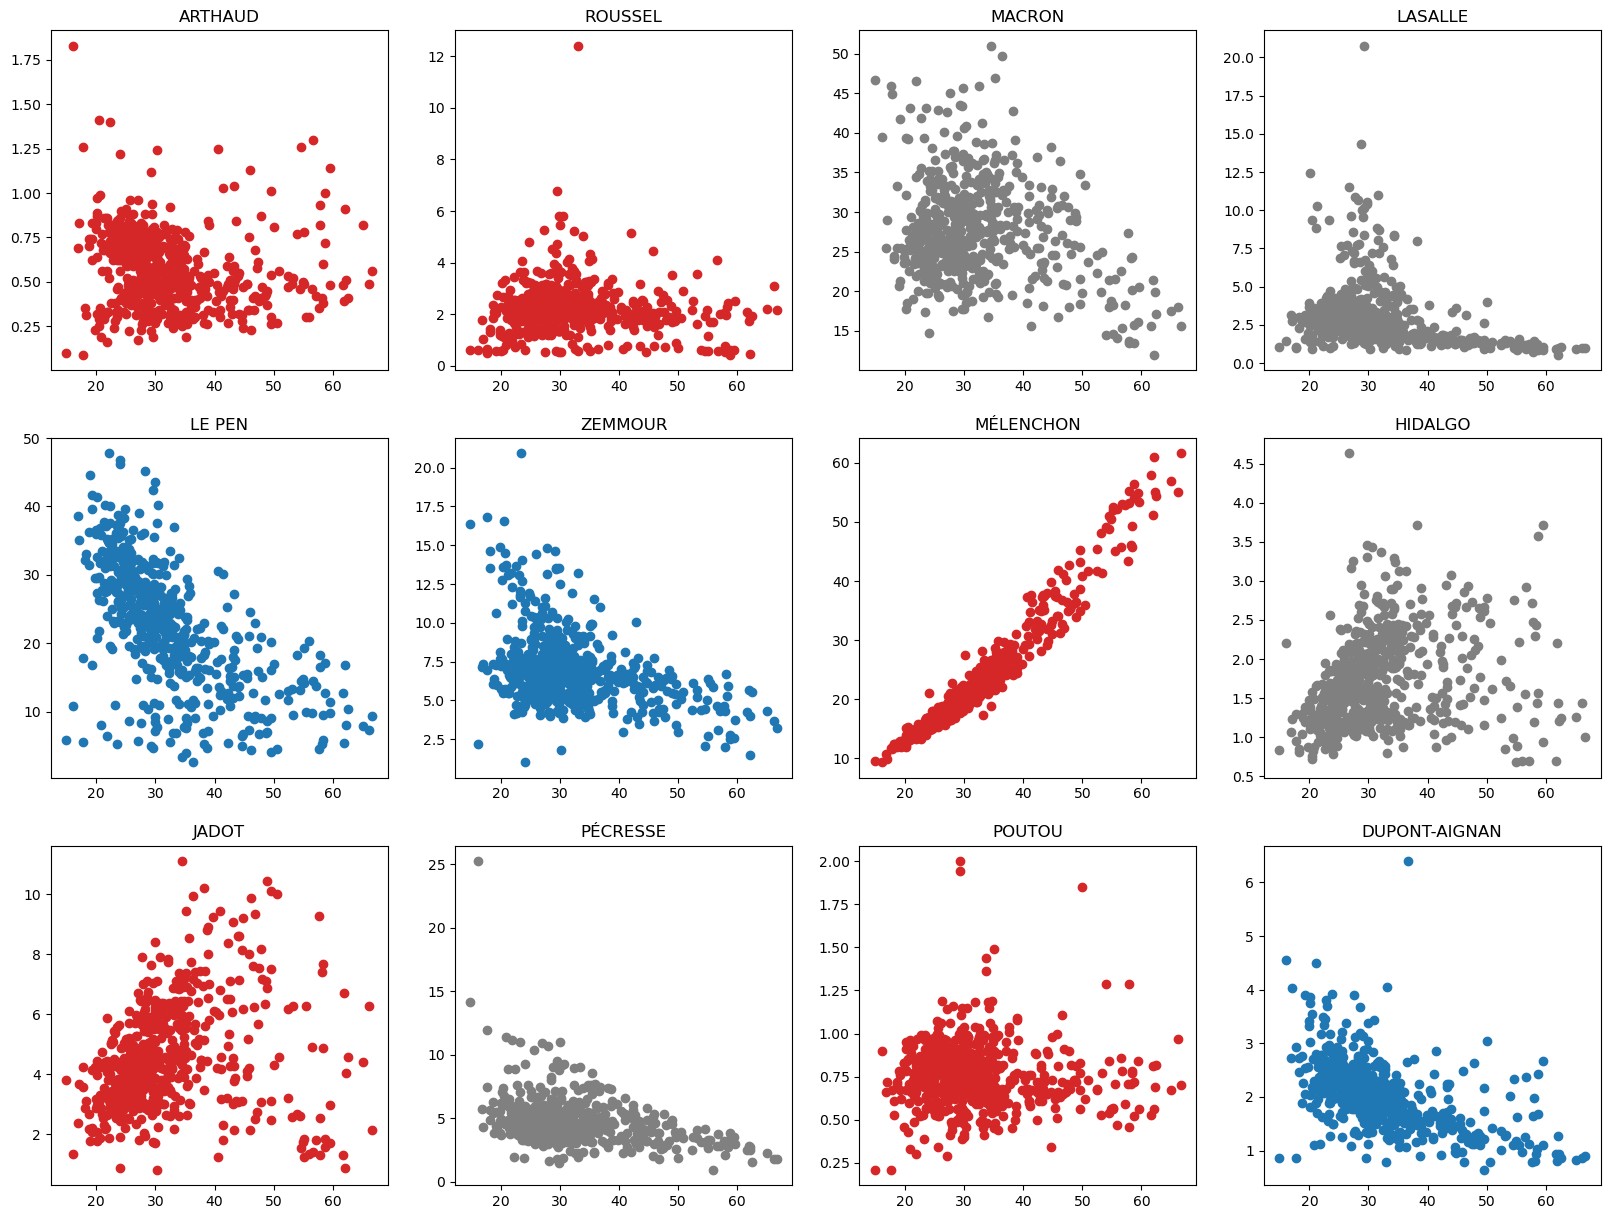

In [42]:
fig,axes = plt.subplots(3,4)
fig.set_size_inches(20,15)

axes[0,0].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_1"], color="C3")
axes[0,0].set(title="ARTHAUD")
axes[0,1].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_2"], color="C3")
axes[0,1].set(title="ROUSSEL")
axes[0,2].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_3"], color="grey")
axes[0,2].set(title="MACRON")
axes[0,3].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_4"], color="grey")
axes[0,3].set(title="LASALLE")
axes[1,0].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_5"])
axes[1,0].set(title="LE PEN")
axes[1,1].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_6"])
axes[1,1].set(title="ZEMMOUR")
axes[1,2].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_7"], color="C3")
axes[1,2].set(title="MÉLENCHON")
axes[1,3].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_8"], color="grey")
axes[1,3].set(title="HIDALGO")
axes[2,0].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_9"], color="C3")
axes[2,0].set(title="JADOT")
axes[2,1].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_10"], color="grey")
axes[2,1].set(title="PÉCRESSE")
axes[2,2].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_11"], color="C3")
axes[2,2].set(title="POUTOU")
axes[2,3].scatter(resultat["pourcentage_gauche"], resultat["% Voix/Exp_12"])
axes[2,3].set(title="DUPONT-AIGNAN")
plt.show()

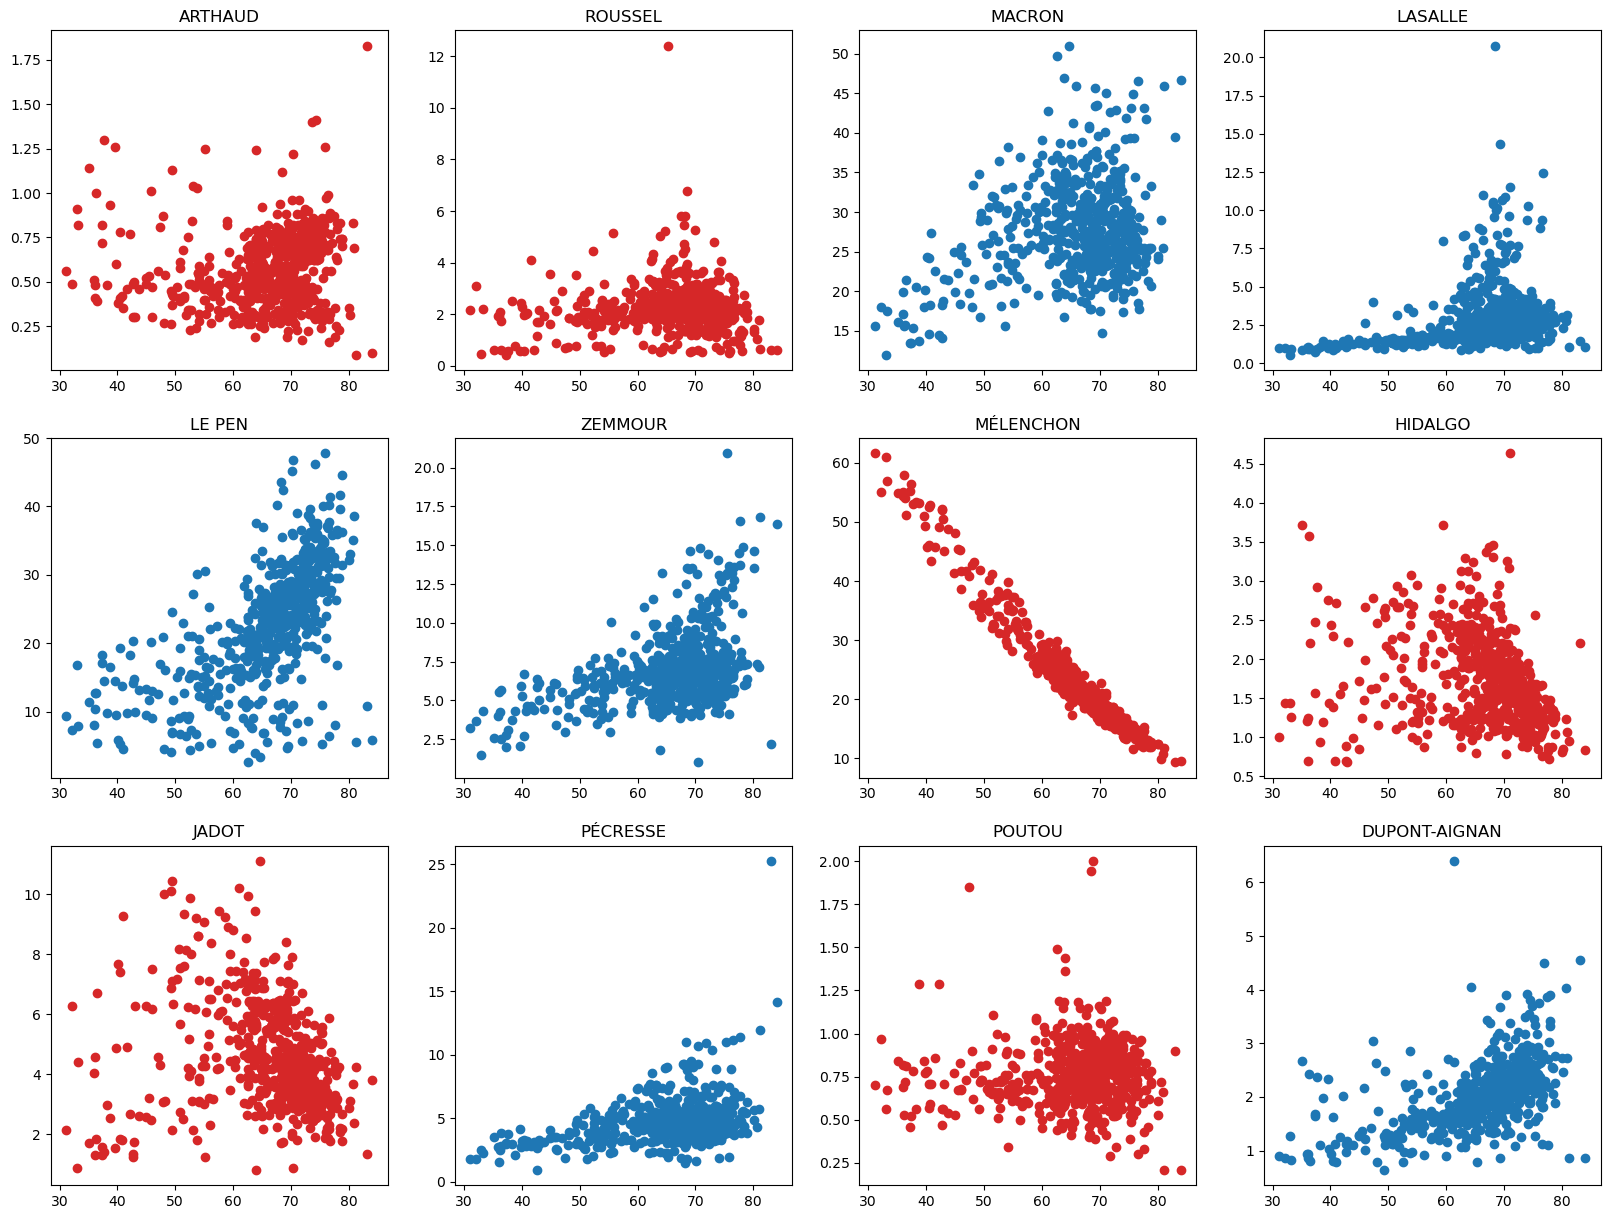

In [41]:
fig,axes = plt.subplots(3,4)
fig.set_size_inches(20,15)

axes[0,0].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_1"], color="C3")
axes[0,0].set(title="ARTHAUD")
axes[0,1].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_2"], color="C3")
axes[0,1].set(title="ROUSSEL")
axes[0,2].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_3"])
axes[0,2].set(title="MACRON")
axes[0,3].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_4"])
axes[0,3].set(title="LASALLE")
axes[1,0].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_5"])
axes[1,0].set(title="LE PEN")
axes[1,1].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_6"])
axes[1,1].set(title="ZEMMOUR")
axes[1,2].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_7"], color="C3")
axes[1,2].set(title="MÉLENCHON")
axes[1,3].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_8"], color="C3")
axes[1,3].set(title="HIDALGO")
axes[2,0].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_9"], color="C3")
axes[2,0].set(title="JADOT")
axes[2,1].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_10"])
axes[2,1].set(title="PÉCRESSE")
axes[2,2].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_11"], color="C3")
axes[2,2].set(title="POUTOU")
axes[2,3].scatter(resultat["pourcentage_droite"], resultat["% Voix/Exp_12"])
axes[2,3].set(title="DUPONT-AIGNAN")
plt.show()